In [84]:
''' Logistic Regression fir binary classification - supervised machine learning model'''

import  pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

X,y = make_classification(n_samples=10000,n_features=20,n_informative=2,n_redundant=10,n_clusters_per_class=1,weights=[0.99],flip_y=0,random_state=4)

print("Data: \n")
pd.DataFrame(X).head()


Data: 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.697603,-1.528509,-0.269717,-0.532205,0.094874,-0.648686,-0.414849,1.067125,0.535193,0.314091,0.487485,3.039230,0.744026,0.452070,0.427102,-0.789302,-0.117243,-0.034101,-0.461851,0.579971
1,-0.168518,1.064735,-0.232287,-0.349821,0.193432,-0.220714,0.776087,0.297242,0.097723,-0.076780,0.175346,-0.331727,-0.492219,0.397847,0.036668,-0.469889,0.134577,-0.111918,-0.083625,0.228432
2,-0.774704,-0.628292,-0.383036,-0.701579,0.190558,-0.752366,0.193185,-0.056257,0.578574,0.272531,0.167519,0.409996,0.061352,2.264368,0.441077,1.088353,-0.048808,-0.089675,-0.498935,0.688206
3,-1.140500,0.523492,-0.450284,-0.882443,0.164624,-1.064101,2.706045,-0.311013,0.873218,0.504985,-0.200148,-1.465542,-0.128846,-0.343157,0.694551,-0.279064,-0.182589,-0.061538,-0.753515,0.953116
4,-0.979635,-0.576502,-0.295281,-0.636856,0.048062,-0.878970,-1.305376,0.469098,0.767329,0.517323,2.409246,0.444597,-0.290880,0.855469,0.632993,-1.114581,-0.246009,0.003898,-0.662529,0.770328


In [72]:
pd.DataFrame(y,columns=['Target'])['Target'].value_counts()

Target
0    9900
1     100
Name: count, dtype: int64

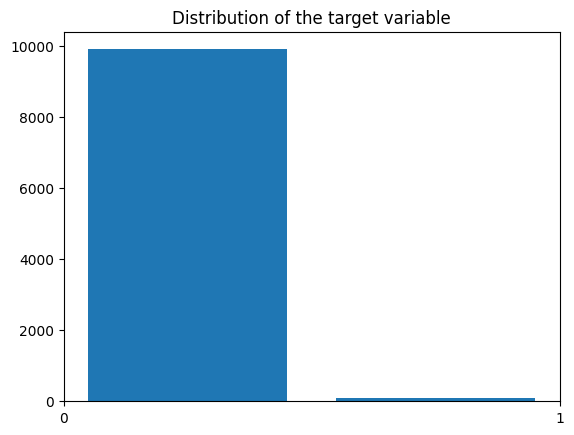

In [73]:
plt.hist(y,bins=2,rwidth=0.8)
plt.title("Distribution of the target variable")
plt.xticks([0,1])
plt.show()

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [75]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [76]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [77]:
print("Classification report : \n",classification_report(y_test,y_pred))
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1978
           1       1.00      0.41      0.58        22

    accuracy                           0.99      2000
   macro avg       1.00      0.70      0.79      2000
weighted avg       0.99      0.99      0.99      2000

ROC AUC Score:  0.7045454545454546


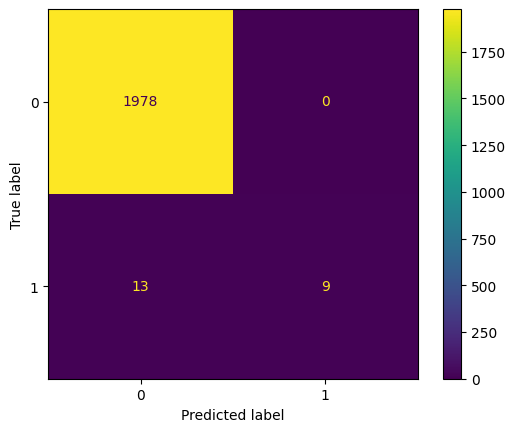

In [78]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [79]:
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [80]:
rfc_y_pred = rfc_model.predict(X_test)

In [81]:
print("classification report: ",classification_report(y_test,rfc_y_pred))

classification report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00      1978
           1       0.85      0.50      0.63        22

    accuracy                           0.99      2000
   macro avg       0.92      0.75      0.81      2000
weighted avg       0.99      0.99      0.99      2000



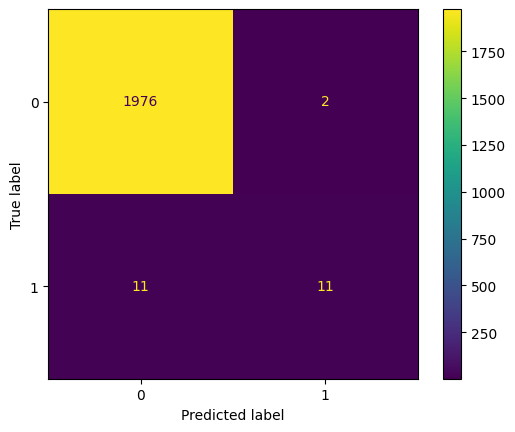

In [82]:
ConfusionMatrixDisplay.from_estimator(rfc_model,X_test,y_test)

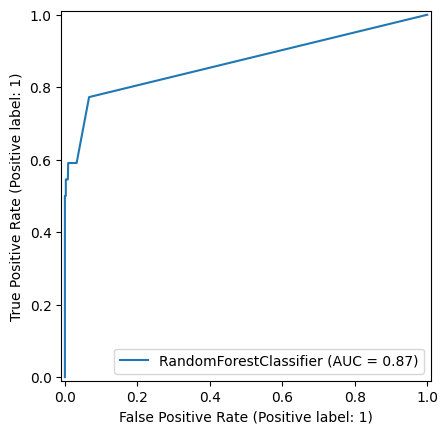

In [85]:
rfc_disp = RocCurveDisplay.from_estimator(rfc_model,X_test,y_test)

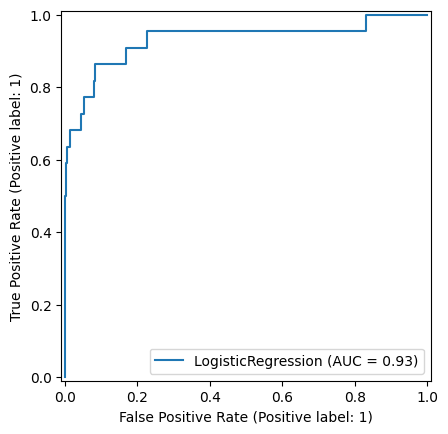

In [86]:
logit_disp = RocCurveDisplay.from_estimator(model,X_test,y_test)